# From quantum to classical modeling of radiation reaction: A focus on stochasticity effects

PHYSICAL REVIEW E 97, 043209 (2018)

Authors: F. Niel, C. Riconda, F. Amiranoff, R. Duclous, and M. Grech

Author of notebook: Óscar Amaro

In this notebook we reproduce figures 1, 2

In [1]:
# numpy
import numpy as np
np.random.seed(19680801)
from numpy.random import default_rng
rng = default_rng()

# import functions
from scipy.special import kv, iv, erf
from scipy.integrate import quad
from numpy import log, log10, sin, cos, exp, sqrt, pi

# interpolate
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.special import gamma, factorial

# physical constants
from scipy.constants import speed_of_light, fine_structure, hbar, elementary_charge, electron_mass

# root finding
from scipy.optimize import fsolve
from scipy import optimize

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm

# progress bar
from tqdm.notebook import tqdm
from tqdm import trange
from time import sleep
from tqdm import tqdm

# warnings
import warnings
warnings.simplefilter('ignore')

def arraycenter(x):
    """
    returns centered array for histograms
    """
    return [(x[i]+x[i+1])/2 for i in range(len(x)-1)]

# Figure 1

In [2]:
def G20(chi, chig):
    """
        equation 20
    """
    nu = 2*chig/(3*chi*(chi-chig))
    # numerical instability of (integrals of) bessel functions, so we use the Series expansion for very low \nu
    if(nu<1e-5):
        k53int = 2**(2/3)*gamma(2/3)/(nu**(2/3)) - pi/sqrt(3) + 3*gamma(2/3)*nu**(4/3)/(8*2**(1/3))
        k23 = gamma(2/3)/(2**(1/3)*nu**(2/3)) + gamma(-2/3)*nu**(2/3)/(2**(5/3))
    else:
        k53int = quad(lambda y: kv(5/3,y), nu, np.inf)[0]
        k23 = kv(2/3,nu)
    return sqrt(3)/(2*pi) * chig/chi * ( k53int + 3/2*chig*nu*k23 )
G20 = np.vectorize(G20)

def fig1b(chi,chig):
    """
        auxiliary function for figure 1 b
    """
    return G20(chi,chig)/chi**2
fig1b = np.vectorize(fig1b)

def fig1c(chi,chig):
    """
        auxiliary function for figure 1 c
    """
    nu = 2*chig/(3*chi*(chi))
    # numerical instability of (integrals of) bessel functions, so we use the Series expansion for very low \nu
    if(nu<1e-5):
        k53int = 2**(2/3)*gamma(2/3)/(nu**(2/3)) - pi/sqrt(3) + 3*gamma(2/3)*nu**(4/3)/(8*2**(1/3))
        k23 = gamma(2/3)/(2**(1/3)*nu**(2/3)) + gamma(-2/3)*nu**(2/3)/(2**(5/3))
    else:
        k53int = quad(lambda y: kv(5/3,y), nu, np.inf)[0]
        k23 = kv(2/3,nu)
    return sqrt(3)/(2*pi) * chig/chi * ( k53int + 3/2*chig*nu*k23 ) / chi**2
fig1c = np.vectorize(fig1c)

def g25(chi):
    """
        equation 25
    """
    res = 9*sqrt(3)/(8*pi) * quad(lambda v: 2*v**2 * kv(5/3,v)/(2+3*v*chi)**2 + 4*v* (3*v*chi)**2 *kv(2/3,v)/(2+3*v*chi)**4, 0, np.inf)[0]
    return res
g25 = np.vectorize(g25)

def h41(chi):
    """
        equation 41
    """
    res = 9*sqrt(3)/(4*pi) * quad(lambda v: 2*chi**3 * v**3 * kv(5/3,v)/(2+3*v*chi)**3 + 54* chi**5 * v**4 *kv(2/3,v)/(2+3*v*chi)**5, 0, np.inf)[0]
    return res

def S39(chi,Kalpha):
    """
        equation 39
    """
    res = 2/3 * Kalpha * chi**2 * g25(chi);
    return res

def R40(chi,gm,Kalpha):
    """
        equation 40
    """
    res = 2/3 * Kalpha * gm * h41(chi);
    return res

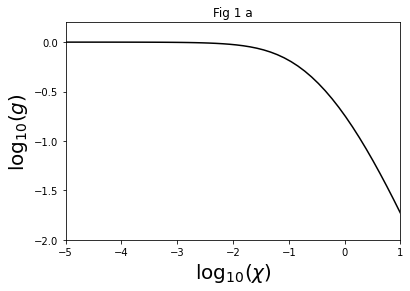

In [3]:
# figure 1 a)
chilst = 10**np.linspace(-5,+1)
glst = g25(chilst)
plt.plot( log10(chilst), log10(glst), 'k-')
plt.xlim([-5,+1])
plt.ylim([-2,+0.2])
plt.xticks([-5,-4,-3,-2,-1,0,1])
plt.yticks([-2.0,-1.5,-1,-0.5,0])
plt.xlabel(r'$\log_{10}(\chi)$',fontsize=20)
plt.ylabel(r'$\log_{10}(g)$',fontsize=20)
plt.title(r'Fig 1 a')
plt.show()

In [16]:
# figure 1 b)
xdim = 40
chilst = 10**np.linspace(-5,+1,xdim)
chigchilst = 10**np.linspace(-8,-0.001,xdim)
X, Y = np.meshgrid(chilst, chigchilst)
fig1blst = fig1b(X,X*Y)
# 
fig1blst[fig1blst<=0] = 9e-12
fig1blst[np.isnan(fig1blst)] = 1e-10
# show log10 of G/chi^2
fig1blst = np.log10(fig1blst)

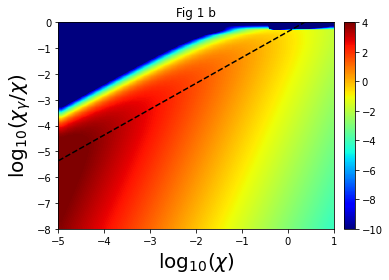

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
im0 = axes.imshow(fig1blst, interpolation='bilinear', origin='lower', cmap='jet',
                  vmax=4, vmin=-10,
                  extent=[np.min(log10(chilst)), np.max(log10(chilst)), np.min(log10(chigchilst)), np.max(log10(chigchilst))])
axes.images.append(im0)

# region of maxima, as stated in caption of figure 1
plt.plot(log10(chilst), log10(0.435*chilst**2/chilst), 'k--')

# numerical instability of bessel functions might happen in this region
#plt.plot(log10(chilst), log10(1e-5*chilst), 'k--')

plt.xlim([-5,+1])
plt.ylim([-8,+0])
plt.xticks([-5,-4,-3,-2,-1,0,1])
plt.yticks([-8,-7,-6,-5,-4,-3,-2,-1,0])
plt.xlabel(r'$\log_{10}(\chi)$',fontsize=20)
plt.ylabel(r'$\log_{10}(\chi_\gamma/\chi)$',fontsize=20)

# colorbar
fractionbar = 0.1*0.355
cbar0 = fig.colorbar(im0, ax=axes,fraction=fractionbar, pad=0.02)
cbar0.set_ticks([-10,-8,-6,-4,-2,0,2,4])
cbar0.set_label(r'',labelpad=1,y=0.5)

# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=3/4/axesratio)

plt.title(r'Fig 1 b')
plt.tight_layout()
#plt.savefig('fig1b.pdf')
plt.show()

In [18]:
# figure 1 c) appears to use the same function as 1b) but without
# the "recoil" chi-chi_g in its definition
xdim = 40
chilst = 10**np.linspace(-5,+1,xdim)
chigchilst = 10**np.linspace(-8,-0.001,xdim)
X, Y = np.meshgrid(chilst, chigchilst)
fig1clst = fig1c(X,X*Y)
# 
fig1clst[fig1clst<=0] = 9e-12
fig1clst[np.isnan(fig1clst)] = 1e-10
# show log10 of G/chi^2
fig1clst = np.log10(fig1clst)

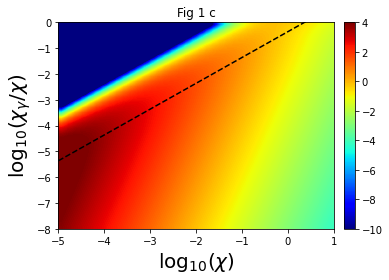

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
im0 = axes.imshow(fig1clst, interpolation='bilinear', origin='lower', cmap='jet',
                  vmax=4, vmin=-10,
                  extent=[np.min(log10(chilst)), np.max(log10(chilst)), np.min(log10(chigchilst)), np.max(log10(chigchilst))])
axes.images.append(im0)

# region of maxima, as stated in caption of figure 1
plt.plot(log10(chilst), log10(0.435*chilst**2/chilst), 'k--')

plt.xlim([-5,+1])
plt.ylim([-8,+0])
plt.xticks([-5,-4,-3,-2,-1,0,1])
plt.yticks([-8,-7,-6,-5,-4,-3,-2,-1,0])
plt.xlabel(r'$\log_{10}(\chi)$',fontsize=20)
plt.ylabel(r'$\log_{10}(\chi_\gamma/\chi)$',fontsize=20)

# colorbar
fractionbar = 0.1*0.355
cbar0 = fig.colorbar(im0, ax=axes,fraction=fractionbar, pad=0.02)
cbar0.set_ticks([-10,-8,-6,-4,-2,0,2,4])
cbar0.set_label(r'',labelpad=1,y=0.5)

# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=3/4/axesratio)

plt.title(r'Fig 1 c')
plt.tight_layout()
#plt.savefig('fig1b.pdf')
plt.show()

# Figure 2

In [47]:
def Gtilde(chi,xi):
    """
        after equation 29
    """
    nu = 2*xi/(3*chi*(1-xi))
    return sqrt(3)*xi/(2*pi) * ( quad(lambda y: kv(5/3,y), nu, np.inf)[0] + xi**2/(1-xi)*kv(2/3,nu) )

# numerically less stable than eq A1
#def an(chi,n):
#    return quad( lambda xi: xi**(n-1) * Gtilde(chi,xi), 0, 1)[0]

def an(chi,n):
    """
        eq A1
    """
    return sqrt(3)*3**(n+1)/(2*pi)*chi**(n+1) * quad(lambda nu: (9*chi**2*nu**(n+2)/(2+3*nu*chi)**(n+3))*kv(2/3,nu) + (nu**(n+1)/((n+1)*(2+3*nu*chi)**(n+1)))*kv(5/3,nu) , 0, np.inf)[0]

def anExp(chi,n):
    """
        eq A1 for chi<<1
    """
    return sqrt(3)/(4*pi*(n+1)) * 3**(n+1) * gamma(n/2+1/6) * gamma(n/2+11/6) * chi**(n+1)

chilst = np.logspace(-4,0.1,60)
an1lst = np.array([an(chi,1) for chi in chilst])
an2lst = np.array([an(chi,2) for chi in chilst])
an3lst = np.array([an(chi,3) for chi in chilst])
an4lst = np.array([an(chi,4) for chi in chilst])

an1Explst = np.array([anExp(chi,1) for chi in chilst])
an2Explst = np.array([anExp(chi,2) for chi in chilst])
an3Explst = np.array([anExp(chi,3) for chi in chilst])
an4Explst = np.array([anExp(chi,4) for chi in chilst])

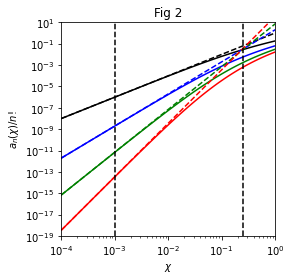

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

auxlst = np.linspace(1e-19,1e1)

# eq A1 ( without dividing by n!... )
axes.plot(chilst, an1lst, 'k-')
axes.plot(chilst, an2lst, 'b-')
axes.plot(chilst, an3lst, 'g-')
axes.plot(chilst, an4lst, 'r-')

# eq A1 (chi << 1 expansion) ( without dividing by n!... )
axes.plot(chilst, an1Explst, 'k--')
axes.plot(chilst, an2Explst, 'b--')
axes.plot(chilst, an3Explst, 'g--')
axes.plot(chilst, an4Explst, 'r--')

axes.plot(auxlst*0+2.5e-1, auxlst, 'k--')
axes.plot(auxlst*0+1e-3, auxlst, 'k--')

axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim([1e-4,1e0])
axes.set_ylim([1e-19,1e1])
axes.set_yticks(10**np.arange(-19,2,2,dtype=float))

# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (log10(ymax)-log10(ymin))/(log10(xmax)-log10(xmin))
axes.set_aspect(aspect=1/axesratio)

axes.set_xlabel(r'$\chi$')
axes.set_ylabel(r'$a_n(\chi)/n!$')
plt.title(r'Fig 2')
plt.tight_layout()
#plt.savefig('fig2.pdf')
plt.show()